# UCI Adult Income Dataset - Exploratory and Descriptive Analysis

In this notebook, we carry out an in-depth exploratory and descriptive analysis of the UCI Adult Income Dataset, a widely used dataset for income prediction tasks based on individual demographic and employment attributes.

This phase of analysis is essential for uncovering patterns, detecting potential biases, and gaining intuition about the dataset’s structure before applying any modelling procedures. We examine the distribution of key numerical and categorical variables, investigate relationships between demographic features and income levels, and use visualizations to summarize insights. Particular focus is placed on income disparities across **age groups**, **geographical regions**, **races**, and **education-occupation combinations**, helping lay a solid foundation for downstream modeling and policy-relevant interpretation.



We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.



In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**
  
These directories will store intermediate and final outputs for reproducibility.


In [ ]:
# define and create paths
# get working directory
project_root_dir = os.getcwd()
#define paths to the data folders
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define paths to docs folder
docs_dir = os.path.join(project_root_dir,'docs')
# define paths to result folder
result_dir = os.path.join(project_root_dir,'results')
# create directories if they do not exist
os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#!mv adult.csv data/processed/

## Loading the Cleaned Dataset

We load the cleaned version of the UCI Adult Income Dataset from the processed data directory into a Pandas DataFrame. The `head(10)` function shows the first ten records, giving a glimpse into the data columns such as `age`, `workclass`, `education_num`, etc.


In [ ]:
adult_df_filename = os.path.join(processed_dir,r"C:\Users\user\Downloads\cleaned_adult_data.csv")
adult_df = pd.read_csv(adult_df_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_level,occupation_grouped,native_region
0,39,government,77516,bachelors,13,single,adm-clerical,single,white,male,2174,0,40,united-states,<=50k,tertiary,white collar,north america
1,50,self-employed,83311,bachelors,13,married,exec-managerial,male spouse,white,male,0,0,13,united-states,<=50k,tertiary,white collar,north america
2,38,private,215646,hs-grad,9,divorced or separated,handlers-cleaners,single,white,male,0,0,40,united-states,<=50k,high school graduate,blue collar,north america
3,53,private,234721,11th,7,married,handlers-cleaners,male spouse,black,male,0,0,40,united-states,<=50k,secondary,blue collar,north america
4,28,private,338409,bachelors,13,married,prof-specialty,female spouse,black,female,0,0,40,cuba,<=50k,tertiary,white collar,central america
5,37,private,284582,masters,14,married,exec-managerial,female spouse,white,female,0,0,40,united-states,<=50k,tertiary,white collar,north america
6,49,private,160187,9th,5,divorced or separated,other-service,single,black,female,0,0,16,jamaica,<=50k,primary,blue collar,central america
7,52,self-employed,209642,hs-grad,9,married,exec-managerial,male spouse,white,male,0,0,45,united-states,>50k,high school graduate,white collar,north america
8,31,private,45781,masters,14,single,prof-specialty,single,white,female,14084,0,50,united-states,>50k,tertiary,white collar,north america
9,42,private,159449,bachelors,13,married,exec-managerial,male spouse,white,male,5178,0,40,united-states,>50k,tertiary,white collar,north america


## Dataset Dimensions and Data Types

Here, we examine the structure of the dataset:

- There are *32,513* entries and *16* variables.
- The dataset includes both **numerical** (e.g., `age`, `hours_per_week`) and **categorical** variables (e.g., `sex`, `education_level`).

Understanding data types and null entries is essential before proceeding with analysis.


In [ ]:
adult_df.shape

(32537, 18)

In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32537 non-null  int64 
 1   workclass           32537 non-null  object
 2   fnlwgt              32537 non-null  int64 
 3   education           32537 non-null  object
 4   education_num       32537 non-null  int64 
 5   marital_status      32537 non-null  object
 6   occupation          32537 non-null  object
 7   relationship        32537 non-null  object
 8   race                32537 non-null  object
 9   sex                 32537 non-null  object
 10  capital_gain        32537 non-null  int64 
 11  capital_loss        32537 non-null  int64 
 12  hours_per_week      32537 non-null  int64 
 13  native_country      32537 non-null  object
 14  income              32537 non-null  object
 15  education_level     30894 non-null  object
 16  occupation_grouped  30


## Summary Statistics: Categorical Variables


In [ ]:
adult_df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,education_level,occupation_grouped,native_region
count,32537,32537,32537,32537,32537,32537,32537,32537,32537,30894,30694,32478
unique,8,16,4,15,5,5,2,42,2,6,4,6
top,private,hs-grad,married,prof-specialty,male spouse,white,male,united-states,<=50k,high school graduate,white collar,north america
freq,22673,10494,14993,4136,13187,27795,21775,29153,24698,10494,17195,30041


In [ ]:
adult_df['workclass'].value_counts(normalize=True)


workclass
private          0.696837
self-employed    0.078065
government       0.069398
local-gov        0.064327
unkown           0.056428
self-emp-inc     0.034299
voluntary        0.000430
never-worked     0.000215
Name: proportion, dtype: float64

`workclass`

The private sector dominates, employing ~69.7% of the population. The government sector (13.4%) and self-employment (11.2%) also make up substantial portions of the workforce. A small fraction is labeled as "unknown" (5.6%), which may correspond to missing or ambiguous data entries. Tiny proportions are voluntary (0.04%) or unemployed (0.02%), possibly underreported or underrepresented in the sample.

`marital_status`

Married individuals make up the largest group (46.1%), followed by those who are single (32.8%) and divorced or separated (18.1%). Widowed individuals represent a small minority (~3.1%).

`relationship`

The majority are labeled as "male spouse" (40.5%) or "single" (36.1%). Smaller categories include children (15.6%), female spouses (4.8%), and extended relatives (3.0%). The dominance of `male spouse` reflects the dataset’s gendered structure and may point to traditional family roles. The relative scarcity of "female spouse" roles suggests potential gender imbalances in how income-earning is reported within households.

`race`

The dataset is overwhelmingly composed of White individuals (~85.4%). Other racial groups include Black (9.6%), Asian or Pacific Islander (3.2%), American Indian or Eskimo (1.0%), and Other (0.8%). The racial imbalance limits the generalizability of models trained on this data. Smaller racial groups may suffer from limited statistical power, affecting fairness and performance in predictive modeling.

`sex`

Males constitute 66.9% of the dataset, with females making up the remaining 33.1%. This male-skewed distribution could be due to sampling (e.g., primary earners in households), workforce participation patterns, or reporting biases.

`education_level`

Secondary-school graduates form the largest educational group (~32%), highlighting the central role of high school completion in the labor force. Tertiary education holders — those with university or equivalent degrees — account for nearly 25% of the population, representing a substantial segment with advanced qualifications. A notable 22.4% have attended some college without necessarily earning a degree, suggesting that partial post-secondary education is common, yet may not always translate into formal certification. The remaining 20% are distributed among those with only secondary education (9.4%), associate degrees (7.5%), primary school (3.5%), and a very small group with only preschool education (0.15%). It is ecident that the education distribution is skewed toward mid- to high-level education, with relatively few individuals having only basic schooling. This reflects a dataset that largely captures working-age adults in formal labor, which may underrepresent the least-educated populations.

`occupation_grouped`

White-collar occupations are the most prevalent (~51%), followed by blue-collar, service, and unknown. Smaller categories include military, which is marginal. Essentially, slightly over half of individuals in the dataset work in professional, managerial, sales, clerical, or tech-support roles. This suggests the dataset is heavily weighted toward professional and administrative occupations. Nearly a third of the population works in manual labor or skilled trade positions (craft, transport, machine operation, farming, etc.). This indicates a significant segment engaged in physically intensive or technical labor.

`native_region`

The vast majority of individuals are from North America (~92.3%). Smaller proportions are from Central America, Asia, Europe, South America, and a generic Other category. The heavy concentration of North American individuals reflects the U.S. focus of the dataset.

`age_group`

The largest groups are 26–35 and 36–45, followed by 46–60. These three age groups represent about 73% of the dataset. Very few individuals are under 18 or above 75, consistent with the dataset's focus on the working-age population.














## Income Distribution

Given that `income` is the target variable, most of the analysis hereafter will be based on it. We first of all examine the income distribution in the dataset.



In [ ]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22788
7,north america,>50k,7253
8,other,<=50k,436
9,other,>50k,146


In [ ]:
total_per_all=adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage']=(adult_df_income_native_region['total_income_distr']/total_per_all)*100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22788,75.856330
7,north america,>50k,7253,24.143670
8,other,<=50k,436,74.914089
9,other,>50k,146,25.085911


In [ ]:

#pip install -U plotly


In [ ]:
#pip install -U kaleido

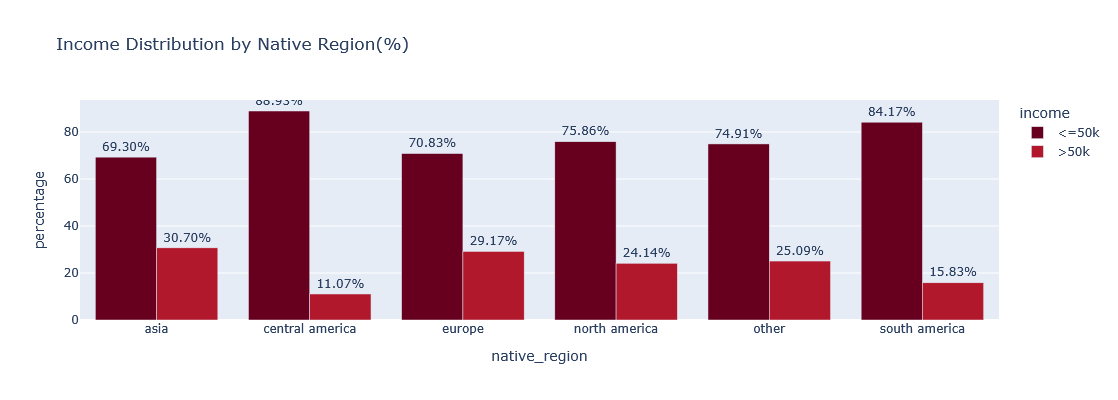

In [ ]:
fig= px.bar(
    adult_df_income_native_region,
    x = 'native_region',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by Native Region(%)',
    barmode = 'group',
    height=400,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_by_nativeregion_bar_plot.html'))



Asia (30.7%) and Europe (29.2%) have the highest proportions of high-income earners. This suggests these immigrant groups might be better integrated into high-paying professional roles, or may represent a more skilled migrant profile in the dataset. Central America (11.1%) and South America (12.1%) have the lowest proportions of >50K earners. With 24.2% of North Americans earning >50K, this serves as a middle-ground baseline. Interestingly, both Asian and European groups outperform the native-born population proportionally in high-income brackets. The 'Other' group sits around 25.1%, close to North America’s rate. This likely reflects a diverse mix of regions not explicitly listed.


In [ ]:
adult_df_income_native_region = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,race,income,total_income_distr
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20680
9,white,>50k,7115


In [ ]:
total_per_all=adult_df_income_native_region.groupby('race')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage']=(adult_df_income_native_region['total_income_distr']/total_per_all)*100
adult_df_income_native_region

,race,income,total_income_distr,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20680,74.401871
9,white,>50k,7115,25.598129


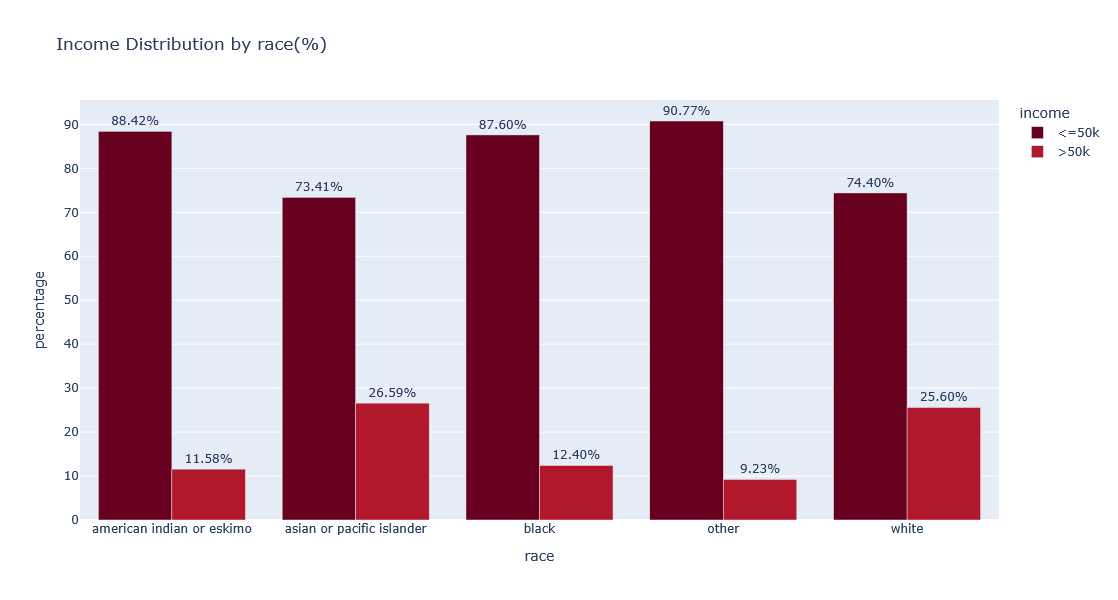

In [ ]:
fig= px.bar(
    adult_df_income_native_region,
    x = 'race',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by race(%)',
    barmode = 'group',
    height=600,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_by_incomegroup_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_incomegroup_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_byincomegroup_bar_plot.html'))



Asian or Pacific Islander (26.6%) and White (25.6%) populations have the highest proportions of >50K earners. Asians/Pacific Islanders marginally outperform Whites, a pattern often attributed to occupational concentration in high-paying sectors like technology and medicine. On the other hand, American Indian or Eskimo (11.6%), Black (12.4%), and Other (9.2%) groups show significantly lower rates of high-income earners. These figures reflect long-standing economic disparities rooted in historical exclusion, occupational segregation, and systemic inequality.

The stark differences in high-income proportions:

- **Between Whites and Blacks**: 25.6% vs 12.4% — slightly over double the proportion.
- **Between Asians and Others**: 26.6% vs 9.2% — nearly triple.

These disparities are consistent with well-documented wage gaps and underrepresentation of marginalized groups in higher-paying roles.


In [ ]:
adult_df_income_edu_occ = adult_df.groupby(['education_level', 'occupation_grouped','income']).size().reset_index(name='total').sort_values('total',ascending=False)
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
5,high school graduate,blue collar,<=50k,5209
19,secondary,blue collar,<=50k,3849
23,secondary,white collar,<=50k,3652
31,tertiary,white collar,<=50k,3293
32,tertiary,white collar,>50k,3205
9,high school graduate,white collar,<=50k,3070
14,primary,blue collar,<=50k,1201
24,secondary,white collar,>50k,972
6,high school graduate,blue collar,>50k,850
10,high school graduate,white collar,>50k,778


##Income by Education Level and Occupation Group

In [ ]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + " | " + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
5,high school graduate,blue collar,<=50k,5209,high school graduate | blue collar
19,secondary,blue collar,<=50k,3849,secondary | blue collar
23,secondary,white collar,<=50k,3652,secondary | white collar
31,tertiary,white collar,<=50k,3293,tertiary | white collar
32,tertiary,white collar,>50k,3205,tertiary | white collar
9,high school graduate,white collar,<=50k,3070,high school graduate | white collar
14,primary,blue collar,<=50k,1201,primary | blue collar
24,secondary,white collar,>50k,972,secondary | white collar
6,high school graduate,blue collar,>50k,850,high school graduate | blue collar
10,high school graduate,white collar,>50k,778,high school graduate | white collar


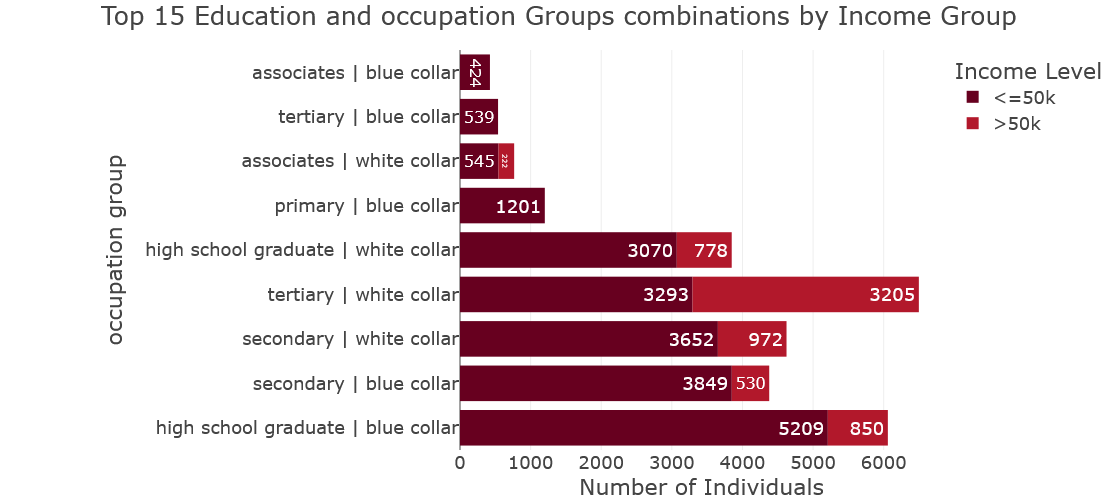

In [ ]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig= px.bar(
    adult_df_combos,
    x = 'total',
    y = 'edu_occ',
    color= 'income',
    orientation = 'h',
    title=f'Top {num} Education and occupation Groups combinations by Income Group',
    #barmode = 'group',
    height=500,
     width=1100,
    text= 'total',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_layout(template="presentation",
                  xaxis_title='Number of Individuals',
                  yaxis_title='occupation group',
                  legend_title=dict(text='Income Level'),
                  margin=dict(l=460, r=50, t=50, b=50))
fig.update_traces(textposition='inside')
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_by_incomegroup_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'income_distribution_by_incomegroup_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'income_distribution_byincomegroup_bar_plot.html'))



From the bar chart, we can pick out the largest groups per income-level. We see that secondary-school graduates working a blue collar job occupy the largest group in the dataset (3976). This reflects a common socio-economic profile: individuals with basic schooling in manual or technical trades predominantly earning lower incomes. The largest high-income group are tertiary-educated individuals in white collar roles. This highlights the strong earning advantage conferred by higher education and skilled jobs.

Some of the key patterns we can get from the dataset are:

- **Education matters, but isn’t deterministic**

Tertiary education combined with white-collar work offers the highest income prospects. Yet a substantial number of tertiary-educated white-collar workers earn <=50K, likely early career, part-time, or structural pay gaps.

- **Blue-collar and service work predominantly pay <=50K, regardless of education.**

Even some college education doesn’t guarantee high incomes in these sectors. Manual and service sector income is highly occupation-dependent (some skilled trades can break the 50K mark).

- **Some non-tertiary education groups do reach >50K**

Secondary-school graduates in blue-collar and white-collar work have decent representation among >50K earners. This reflects upward mobility possible through skilled trades, tenure, or niche roles.
